In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import glob
from IPython.display import Image, clear_output    # to display image
from tqdm import tqdm

In [3]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
!pip install -r requirement.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Keras-2.0.3.tar.gz (196 kB)
  Using cached Theano-1.0.5.tar.gz (2.8 MB)
     |████████████████████████████████| 511.7 MB 5.9 kB/s 
     |████████████████████████████████| 438 kB 67.7 MB/s 
     |████████████████████████████████| 5.8 MB 56.0 MB/s 
     |████████████████████████████████| 511.7 MB 4.4 kB/s 
     - 668.6 MB 2.2 MB/s
     |████████████████████████████████| 497.9 MB 16 kB/s 
     / 668.6 MB 46.4 MB/s
     \ 668.6 MB 2.3 MB/s
     |████████████████████████████████| 497.9 MB 19 kB/s 
     / 668.3 MB 101.8 MB/s
     |████████████████████████████████| 462 kB 63.1 MB/s 
     |████████████████████████████████| 497.5 MB 25 kB/s 
     | 671.4 MB 421 kB/s
     |████████████████████████████████| 463 kB 70.9 MB/s 
     |████████████████████████████████| 495.4 MB 34 kB/s 
     \ 671.4 MB 2.7 MB/s
     |████████████████████████████████| 495.4 MB 30 kB/s 
     |███████████████

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
# read the csv file using read_csv function of pandas
train = pd.read_csv('train.csv')
train.head()

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc


In [4]:
images = train.image.unique()


In [5]:
# Number of unique training images
train['image'].nunique()

100

In [6]:
# Number of classes
train['label'].value_counts()

rbc    2237
wbc     103
Name: label, dtype: int64

In [7]:
train_images = images[:70]
test_images = images[70:]

In [8]:
import os
working_dir = '/content/drive/MyDrive'
train_dir = os.path.join( working_dir, 'train_images')
test_dir = os.path.join( working_dir, 'test_images')

In [9]:
train_dir = "/content/drive/MyDrive/train_images" 
test_dir = "/content/drive/MyDrive/test_images"

for dd in [train_dir, test_dir]:
    for ss in ["images", "labels"]:
        print(os.path.join(dd, ss))
        os.makedirs(os.path.join(dd, ss), exist_ok=True)

/content/drive/MyDrive/train_images/images
/content/drive/MyDrive/train_images/labels
/content/drive/MyDrive/test_images/images
/content/drive/MyDrive/test_images/labels


In [10]:
working_dir

'/content/drive/MyDrive'

(640, 640, 3)


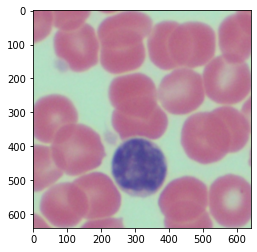

In [11]:
import cv2
image = cv2.imread('/content/drive/MyDrive/train_images/images/image-100.png')
image = image[:,:,2::-1]
print(image.shape)
plt.imshow(image)

In [12]:
WIDTH = 256
HEIGHT = 256
cells_id = {
    'rbc': 0,
    'wbc': 1
}

In [13]:
cells_classes = list(cells_id.keys())
cells_classes

['rbc', 'wbc']

In [14]:
working_dir

'/content/drive/MyDrive'

In [15]:
working_dir

'/content/drive/MyDrive'

In [16]:
for image in train_images:
    lables_file = os.path.join(train_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj: #write
        for box in train.loc[train.image == image].values: #image in csv or txt
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))
        
for image in test_images:
    lables_file = os.path.join(test_dir, 'labels', image.replace(".png", ".txt"))
    with open(lables_file, "w") as wobj:
        for box in train.loc[train.image == image].values:
            wobj.write("%d %f %f %f %f \n" % (
                cells_id[box[5]],
                ((box[3]+box[1])/2.0) / WIDTH,
                ((box[4]+box[2])/2.0) / HEIGHT,
                (box[3]-box[1]) / WIDTH,
                (box[4]-box[2]) / HEIGHT
            ))

In [17]:
SIZE_W = 640
SIZE_H = 640

In [18]:
SIZE = (SIZE_W, SIZE_H)

def replace_image(src_file, dst_file, size=SIZE):
    image = cv2.imread(src_file) 
    image = cv2.resize(image, size)
    cv2.imwrite(dst_file, image)

In [19]:
train_images_dir = "/content/drive/MyDrive/images"

for image in train_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(train_dir, 'images', image)
    replace_image(src_file, dst_file)
        
for image in test_images:
    src_file = os.path.join(train_images_dir , image)
    dst_file = os.path.join(test_dir, 'images', image)
    replace_image(src_file, dst_file)


/content/drive/MyDrive/train_images/images/image-100.png
/content/drive/MyDrive/train_images/labels/image-100.txt


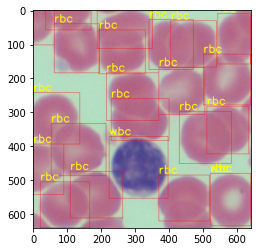

In [20]:
def draw_image(image_file, label_file, class_names):   
    image = cv2.imread(image_file)
        
    with open(label_file) as fobj:
        while True:            
            item = fobj.readline()
            if item is None or len(item)<=0:
                break
                
            item = item.split()
            
            lb = int(item[0])
            xc = float(item[1]) * SIZE_W
            yc = float(item[2]) * SIZE_H
            w = float(item[3]) * SIZE_W
            h = float(item[4]) * SIZE_H
        
            image = cv2.rectangle(image, (int(xc - w/2), int(yc - h/2)), (int(xc + w/2), int(yc + h/2)), (0,0,255), 1)
            image = cv2.putText(image, class_names[lb], (int(xc - w/2), int(yc - h/2 - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 255, 255), 2)
        
    return image

train_file = train_images[0]
image_file = os.path.join(train_dir, 'images', train_file)
label_file = os.path.join(train_dir, 'labels', train_file.replace(".png", ".txt"))

print(image_file)
print(label_file)

image = draw_image(image_file, label_file, cells_classes)
image = image[:,:,2::-1]
plt.imshow(image);

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!git clone  https://github.com/kbardool/Keras-frcnn.git

fatal: destination path 'Keras-frcnn' already exists and is not an empty directory.


In [ ]:
data = pd.DataFrame()
data['format'] = train['image']  
# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = '/content/drive/MyDrive/train/images/' + data['format'][i]
    
# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['label'][i]
data.to_csv('annotate.txt', header=None, index=None, sep=' ')

In [ ]:
 cd /content/drive/MyDrive /Keras-frcnn

/content/drive/MyDrive /Keras-frcnn


In [ ]:

!python train_frcnn.py -o simple -p annotate.txt 

Traceback (most recent call last):
  File "train_frcnn.py", line 12, in <module>
    from keras.optimizers import Adam, SGD, RMSprop
ImportError: cannot import name 'Adam' from 'keras.optimizers' (/usr/local/lib/python3.7/dist-packages/keras/optimizers.py)
